# Analyzing credit card fraud

In [4]:
cd ..

/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools


In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src.eda import EDA
from src.classification import Classification, ConfusionMatrix
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('data/creditcard.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,1.089,1.021,0.999,0.995,0.959,0.915,0.876,0.849,0.838,0.814,0.771,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,-0.762,-0.406,-0.649,-0.426,-0.583,-0.468,-0.484,-0.499,-0.456,-0.212,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,-0.033,0.140,-0.014,0.051,0.048,0.066,-0.066,-0.004,0.004,-0.062,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,0.740,0.618,0.663,0.493,0.649,0.523,0.400,0.501,0.459,0.133,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [10]:
# def PlotHistogram(df,norm):
#     bins = np.arange(df['Time'].min(),df['Time'].max()+2)
#     plt.figure(figsize=(15,4))
#     sns.distplot(df[df['Class']==0.0]['Time'],
#                  norm_hist=norm,
#                  bins=bins,
#                  kde=False,
#                  color='b',
#                  hist_kws={'alpha':.5},
#                  label='Legit')
#     sns.distplot(df[df['Class']==1.0]['Time'],
#                  norm_hist=norm,
#                  bins=bins,
#                  kde=False,
#                  color='r',
#                  label='Fraud',
#                  hist_kws={'alpha':.5})
#     plt.xticks(range(0,24))
#     plt.legend()
#     plt.show()
    
# print('Normalized histogram of Legit/Fraud by minute')
# PlotHistogram(df,True)

### 13% of rows have outliers

In [11]:
print( len(df[~(np.abs(stats.zscore(df)) < 3).all(axis=1)]) ) #number of rows w/ outliers
print( round(len(df[~(np.abs(stats.zscore(df)) < 3).all(axis=1)])/len(df), 4) ) #pct of rows w/ outliers
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] #keep only rows w/o outliers

37864
0.1329


In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
#getting rid of minute ('Time') for now, hard to see relevance
X_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
y_col = 'Class'

In [24]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,0.117,-0.011,-0.420,-0.105,0.173,-0.063,0.085,-0.037,-0.009,0.031,-0.248,0.124,-0.066,-0.099,-0.183,0.012,-0.073,0.090,0.029,-0.051,0.045,0.144,0.051,-0.016,-0.233,-0.041,-0.005,-0.009,-0.011,-0.012
V1,0.117,1.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.228,-0.101
V2,-0.011,0.000,1.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.531,0.091
V3,-0.420,-0.000,0.000,1.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.211,-0.193
V4,-0.105,0.000,-0.000,-0.000,1.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.099,0.133
V5,0.173,0.000,-0.000,-0.000,-0.000,1.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.386,-0.095
V6,-0.063,0.000,0.000,0.000,-0.000,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.216,-0.044
V7,0.085,0.000,0.000,0.000,0.000,-0.000,0.000,1.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.397,-0.187
V8,-0.037,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.103,0.020
V9,-0.009,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.044,-0.098


In [25]:
eda = EDA(df, X_cols, y_col)

/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/eda.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/eda.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/src/eda.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, s

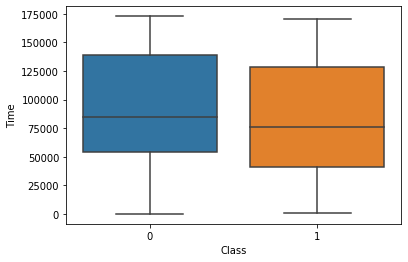

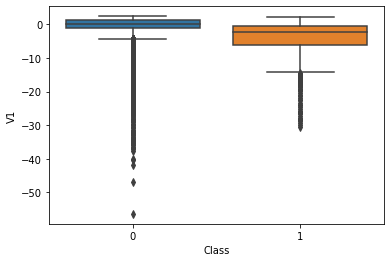

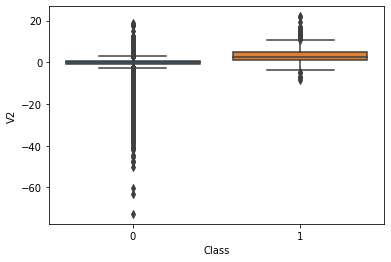

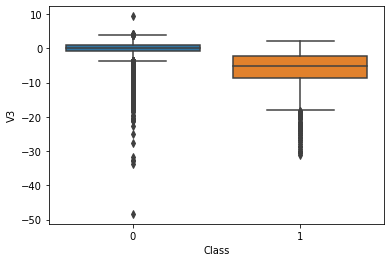

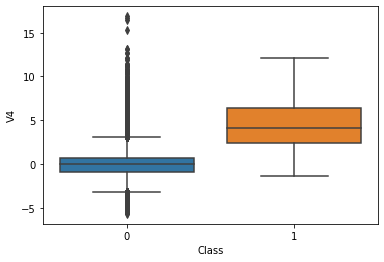

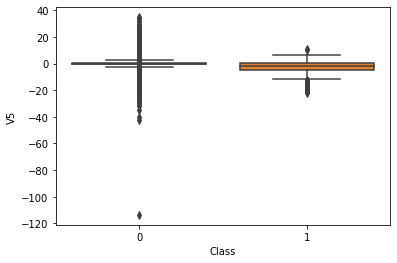

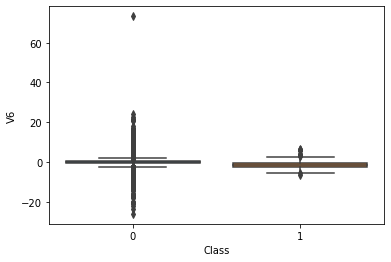

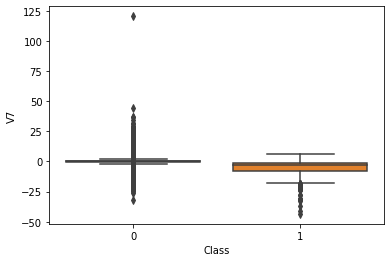

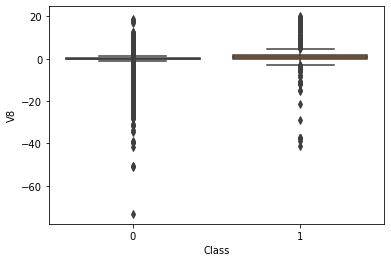

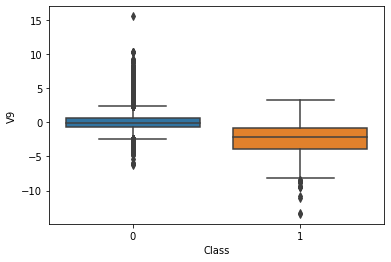

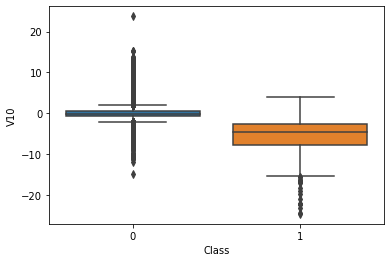

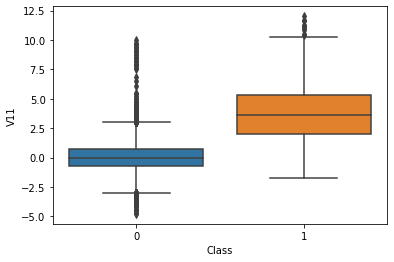

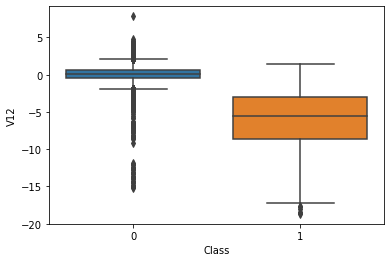

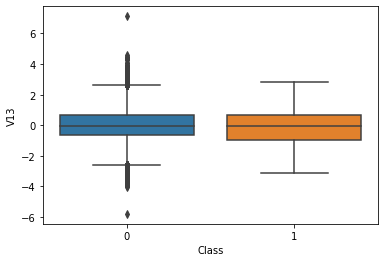

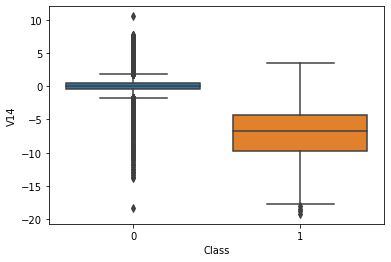

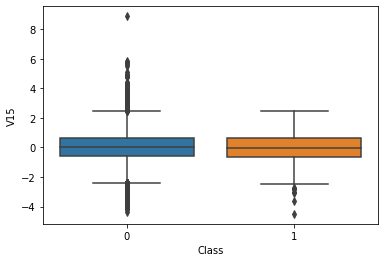

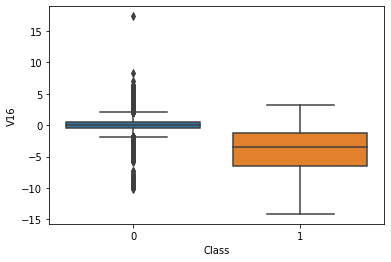

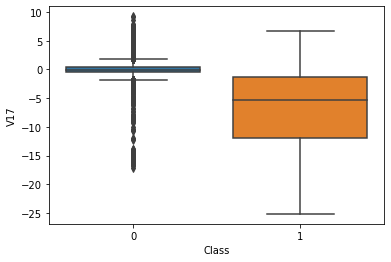

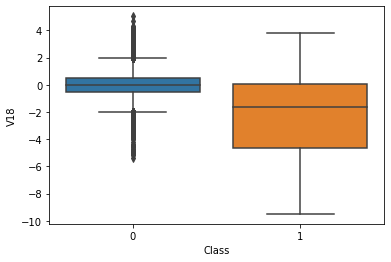

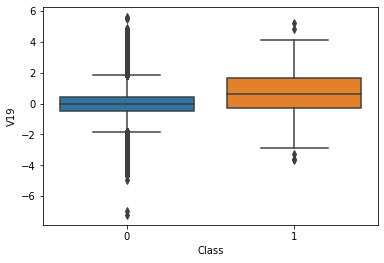

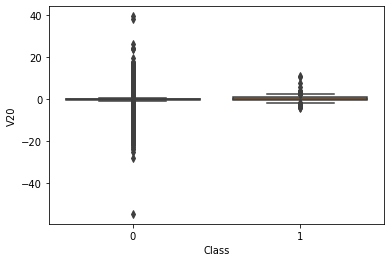

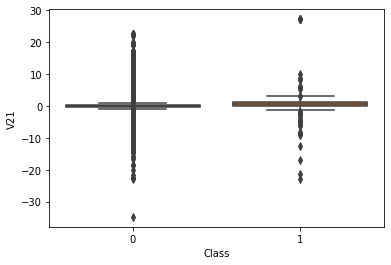

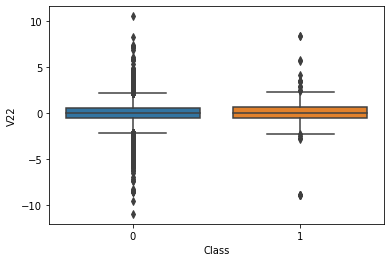

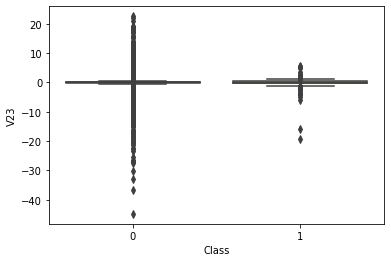

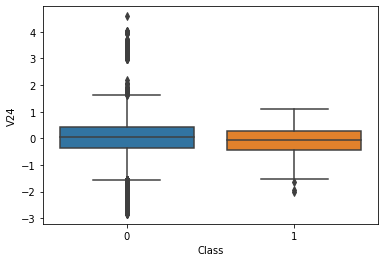

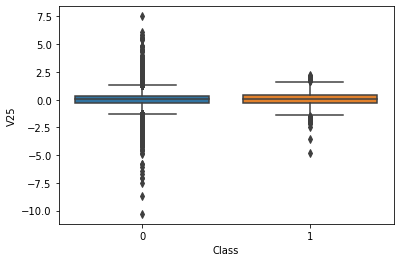

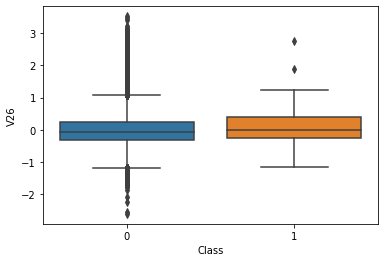

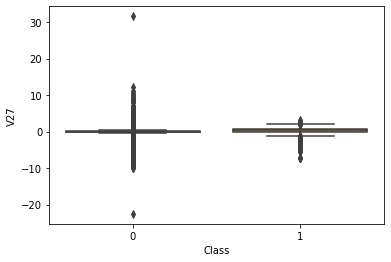

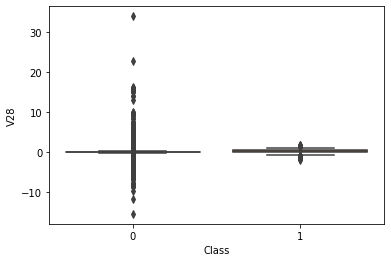

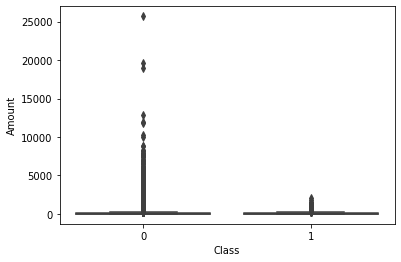

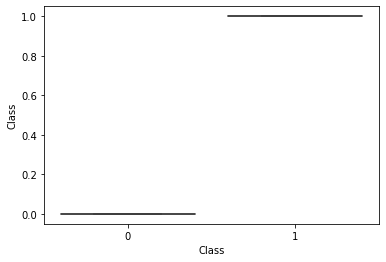

In [26]:
eda.boxplots(hue='Class');

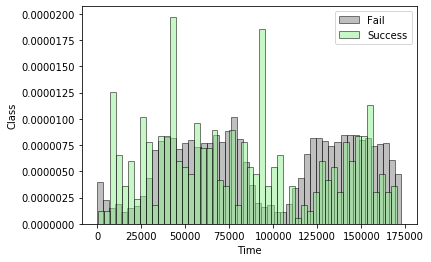

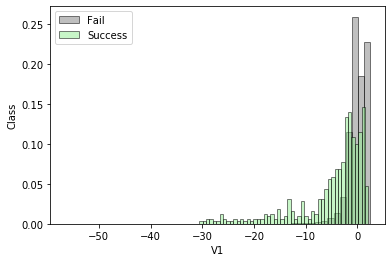

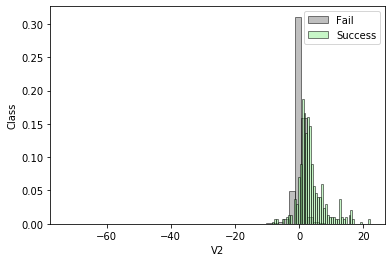

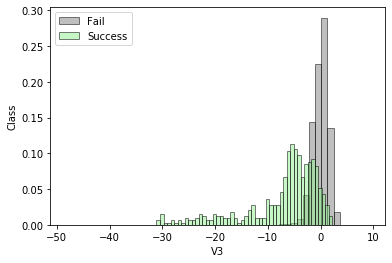

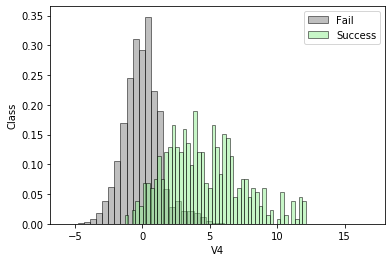

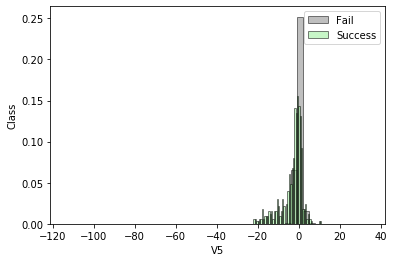

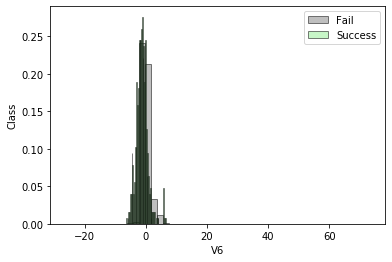

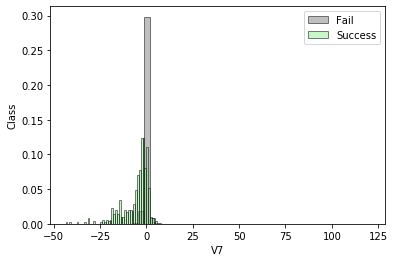

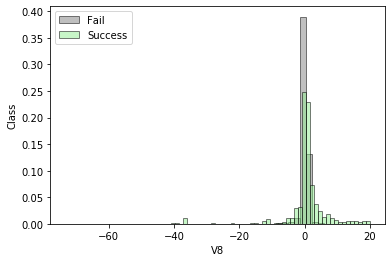

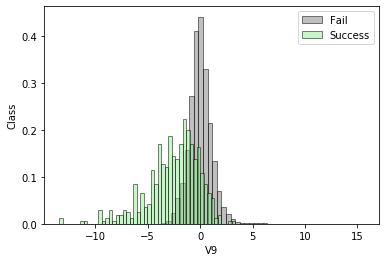

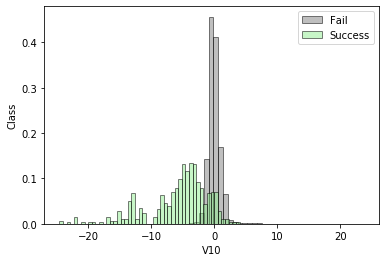

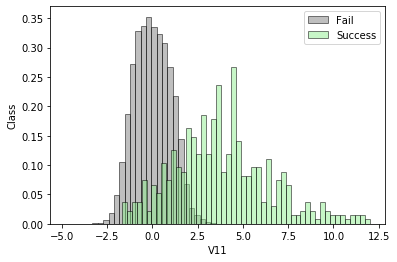

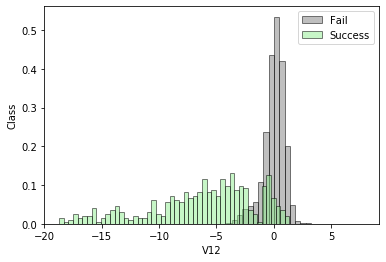

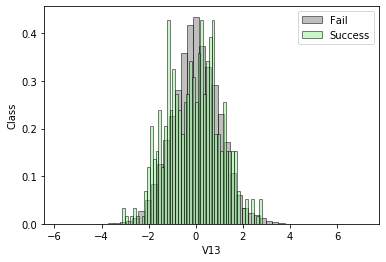

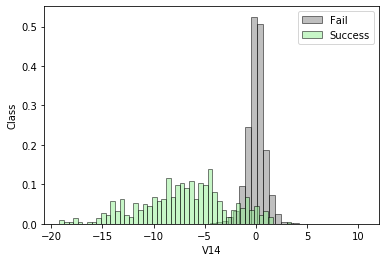

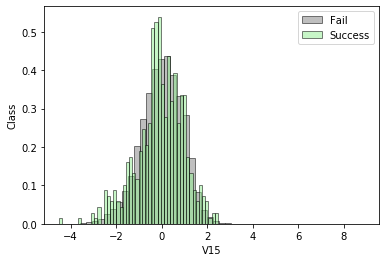

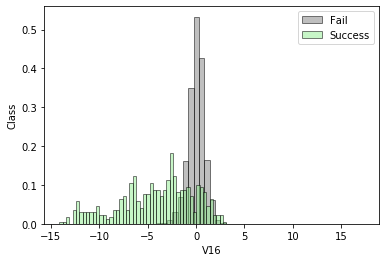

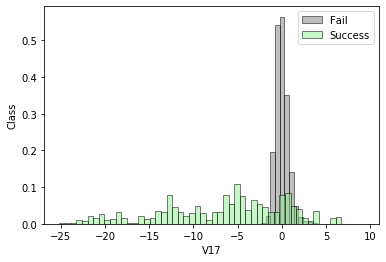

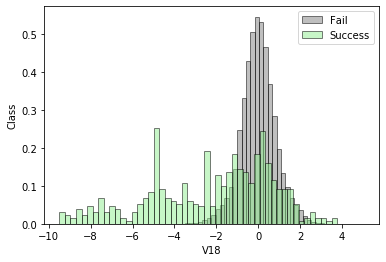

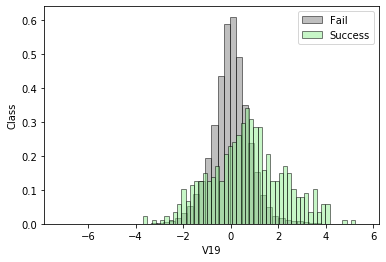

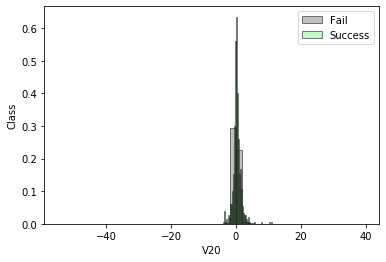

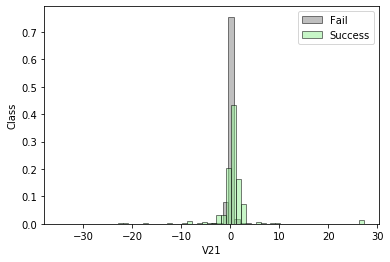

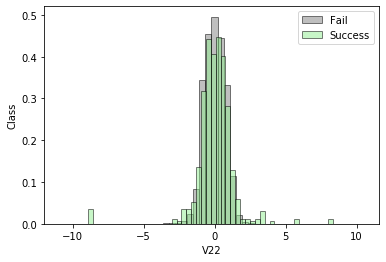

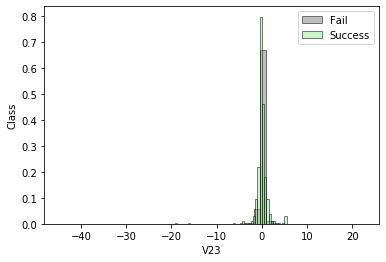

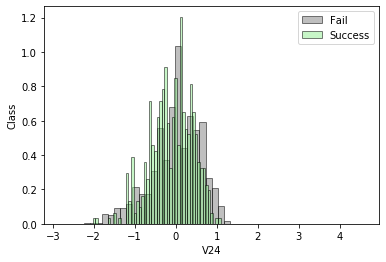

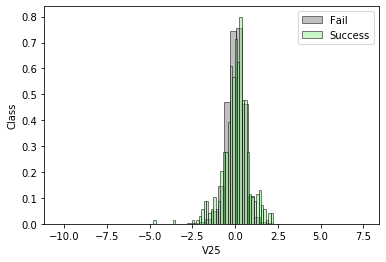

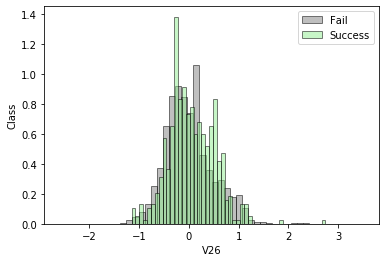

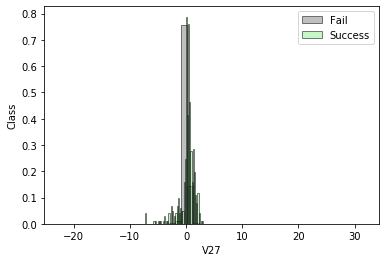

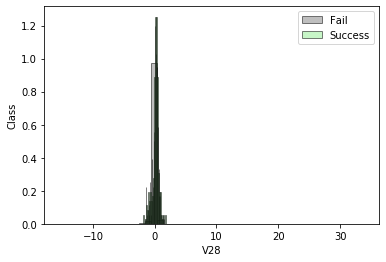

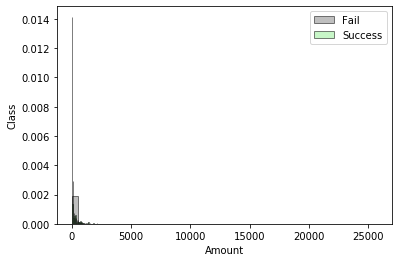

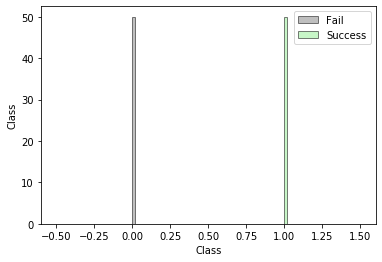

In [39]:
kwargs = {'density':True}
eda.histograms(hue=True, **kwargs)

In [27]:
clf = Classification(df, X_cols, y_col)

In [29]:
%%time
alphas = np.logspace(-3, 1, 5)
l1_ratios = [0, 1]
folds = 3
model, preds = clf.elastic_net_sgd(alphas, l1_ratios, folds)
#60 models

-------- BEST MODEL --------
SGDClassifier(alpha=10.0, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
-------- ---------- --------
CPU times: user 1.65 s, sys: 198 ms, total: 1.85 s
Wall time: 5min 8s


V4        0.027
V11       0.027
V2        0.012
V21       0.009
V27       0.005
V28       0.004
Amount    0.003
V20       0.003
V19       0.002
V25       0.001
V26       0.000
V22      -0.000
V15      -0.001
V23      -0.002
V8       -0.002
V24      -0.002
V13      -0.003
V5       -0.005
V6       -0.008
V18      -0.009
V1       -0.011
V9       -0.014
V7       -0.019
V16      -0.025
V3       -0.027
V10      -0.032
V17      -0.036
V12      -0.042
V14      -0.060
dtype: float64
Intercept   [-0.35903315]


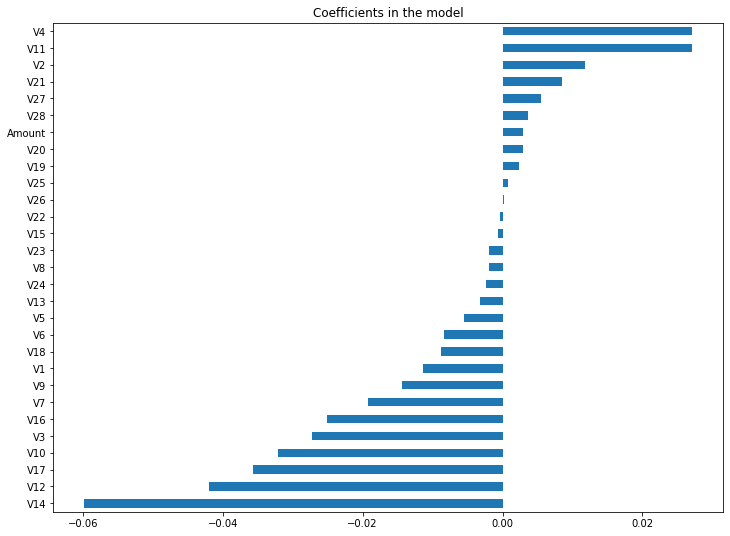

In [30]:
clf.coefficient_plot(model)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

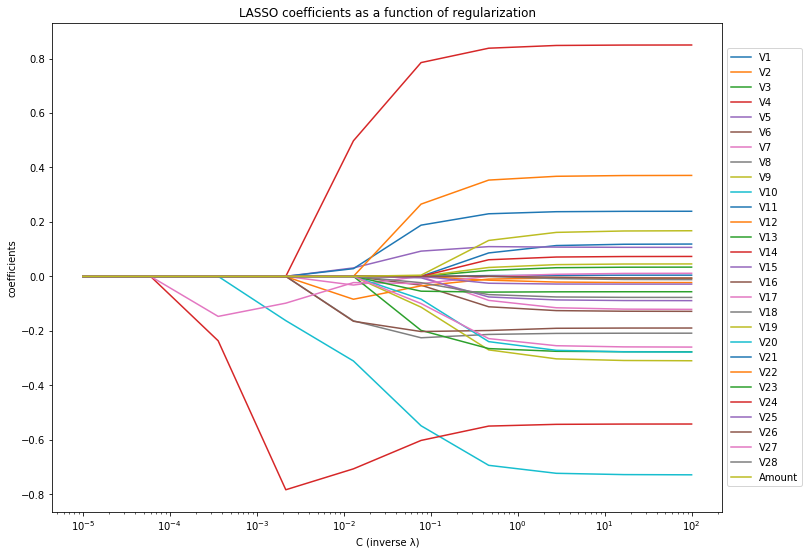

CPU times: user 23min 34s, sys: 11.4 s, total: 23min 45s
Wall time: 24min 45s


In [47]:
%%time
clf.lasso_plot(np.logspace(2, -5, 10))

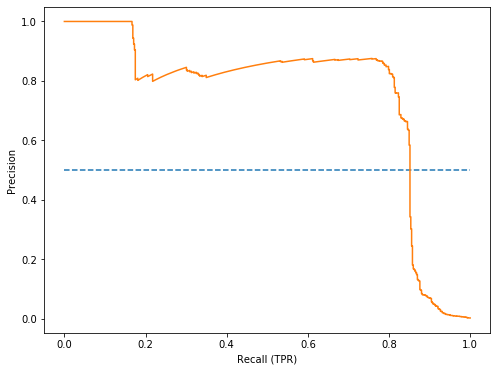

P/R ratio closest to 1: 0.9979716024340771
    Decision threshold: 0.5286246869592827
             Precision: 0.8113590263691683
                Recall: 0.8130081300813008
CPU times: user 696 ms, sys: 19.3 ms, total: 716 ms
Wall time: 482 ms


In [31]:
%%time
clf.pr_curve(model)

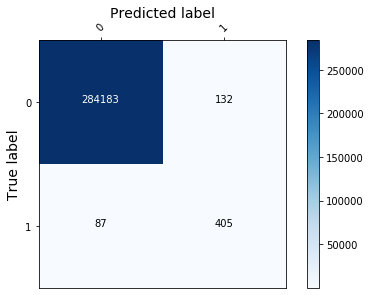

Accuracy =      0.999
Precision =     0.754
Recall (TPR) =  0.823
Fallout (FPR) = 0.000

---- Classification Report ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.75      0.82      0.79       492

    accuracy                           1.00    284807
   macro avg       0.88      0.91      0.89    284807
weighted avg       1.00      1.00      1.00    284807

CPU times: user 1.41 s, sys: 79.4 ms, total: 1.49 s
Wall time: 908 ms


In [32]:
%%time
cm = ConfusionMatrix(df[y_col], preds, model)
cm.plot_matrix()

## Trying elastic net (not sgd)

In [41]:
%%time
alphas = np.logspace(-3, 1, 5)
l1_ratios = [0, 0.5, 1]
folds = 5
model, preds = clf.elastic_net(alphas, l1_ratios, folds, imbalanced=True)
#75 models

-------- BEST MODEL --------
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=1000,
                   multi_class='warn', n_jobs=-1, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
-------- ---------- --------
CPU times: user 1min 13s, sys: 823 ms, total: 1min 14s
Wall time: 1h 12min 26s


V4        0.230
V11       0.142
V5        0.072
V21       0.053
V22       0.040
Amount    0.036
V2        0.019
V26       0.014
V18       0.010
V28       0.006
V19       0.001
V20      -0.003
V27      -0.004
V1       -0.011
V15      -0.012
V25      -0.018
V24      -0.019
V23      -0.022
V7       -0.030
V6       -0.039
V13      -0.050
V17      -0.076
V3       -0.088
V9       -0.101
V16      -0.104
V8       -0.128
V10      -0.189
V12      -0.207
V14      -0.424
dtype: float64
Intercept   [-7.34497686]


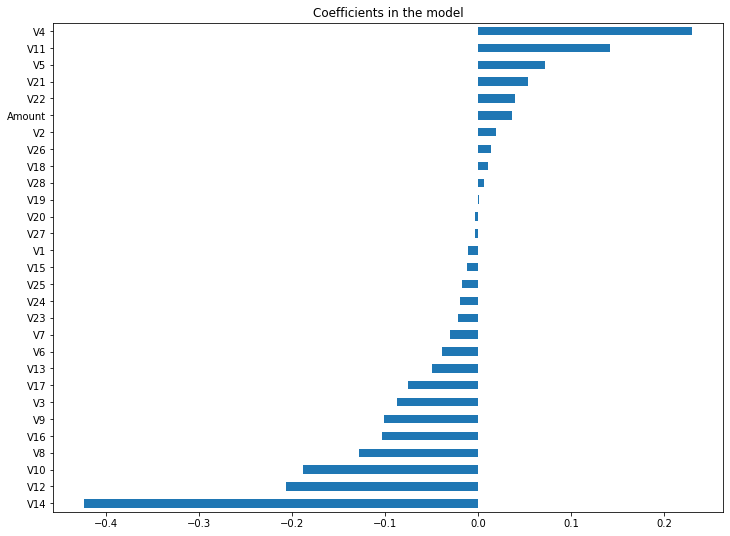

In [42]:
clf.coefficient_plot(model)

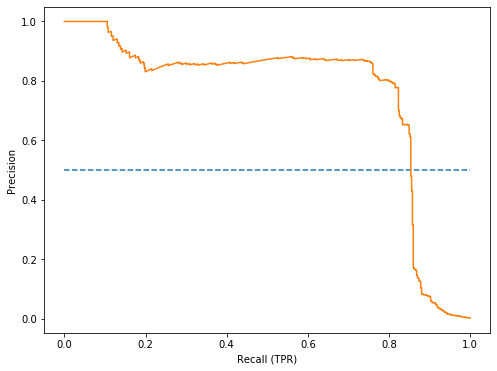

P/R ratio closest to 1: 0.9979716024340771
    Decision threshold: 0.03964939568361
             Precision: 0.7991886409736308
                Recall: 0.8008130081300813


In [43]:
clf.pr_curve(model)

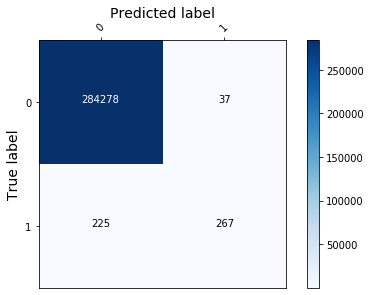

Accuracy =      0.999
Precision =     0.878
Recall (TPR) =  0.543
Fallout (FPR) = 0.000

---- Classification Report ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.88      0.54      0.67       492

    accuracy                           1.00    284807
   macro avg       0.94      0.77      0.84    284807
weighted avg       1.00      1.00      1.00    284807



In [46]:
cm = ConfusionMatrix(df[y_col], preds, model)
cm.plot_matrix()